In [1]:
import numpy as np
import pandas as pd

import os, sys
import random
import sklearn

try:
    os.chdir('CrowdInference')
    sys.path.append(os.getcwd())
except:
    pass

import crowd_inference.methods.dawid_skene as ds
import crowd_inference.methods.majority_vote as mv
import crowd_inference.methods.raykar as r
import crowd_inference.methods.raykar_boosting as rb
import crowd_inference.methods.raykar_plus_ds as rds
import crowd_inference.methods.classifier as cls
import benchmark as bm

from crowd_inference.truth_inference import NoFeaturesInference, TruthInference, WithFeaturesInference
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt
from collections import defaultdict
import tests.data_provider as data
from tqdm.auto import tqdm

import seaborn as sns
sns.set()
sns.set(font_scale=1.2)


from importlib import reload

def reload_all():
    reload(ds)
    reload(r)
    reload(rb)
    reload(rds)
    reload(cls)
    reload(bm)

reload(data)

<module 'tests.data_provider' from '/Users/andrey/Documents/5Course/CrowdInference/tests/data_provider.py'>

In [7]:
flip_probs = [0.2, 0.2, 0.3, 0.5, 0.6]
mushrooms_data = data.MushroomsDataProvider(resample=False, flip_probs=flip_probs, annotate_prob=0.7)

3916
4208


Iter 00, logit: -2.877865
Iter 10, logit: -2.704263
Iter 20, logit: -2.700668
Iter 30, logit: -2.698757
Iter 40, logit: -2.697182
Iter 50, logit: -2.695870
Iter 60, logit: -2.694791
Iter 70, logit: -2.693914
Iter 80, logit: -2.693207
Iter 90, logit: -2.692642
[0.41913481 0.58086519]
---------------
Label accuracy is 0.8136636405600862
--------------------------------------------------
Data has 57 features
Iter 00, logit: -2.834858
Iter 10, logit: -2.400298
Iter 20, logit: -2.363238
Iter 30, logit: -2.352298
Iter 40, logit: -2.348209
Iter 50, logit: -2.346545
Iter 60, logit: -2.345841
Iter 70, logit: -2.345538
Iter 80, logit: -2.345406
Iter 90, logit: -2.345348
Label accuracy is 0.9130635482381905
--------------------------------------------------
Data has 57 features
Iter 00, logit: -2.817450
Average Raykar weight is 0.6719495306970303
Iter 10, logit: -2.369593
Average Raykar weight is 0.7221110940144637
Iter 20, logit: -2.362213
Average Raykar weight is 0.725650100015387
Iter 30, logi

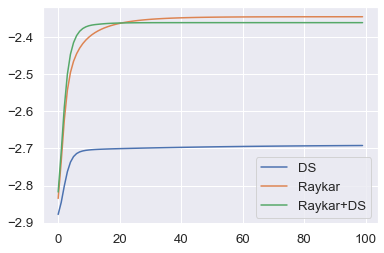

In [46]:
reload_all()
# 0.918
mushrooms_methods, mushroom_points, advantages_matrix = bm.compare_methods(mushrooms_data, max_iter=100, lr=0.5)
bm.print_conf(mushrooms_methods)

Number of data points: 6499


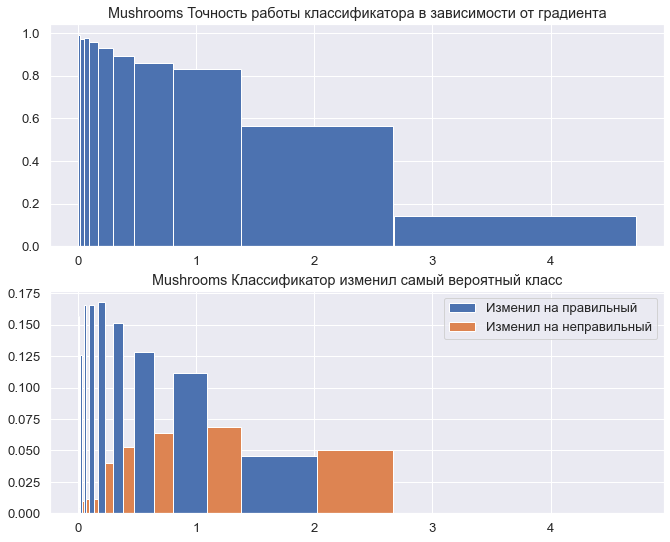

In [45]:
reload_all()
buckets, confidences, wrong, correct = bm.build_grad_hist(mushrooms_data, mushrooms_methods, mushroom_points, 'Mushrooms', 700)
condidence_mushrooms = bm.get_confidence(buckets[0], confidences[0])

Iter 00, logit: -2.877865
Iter 10, logit: -2.704263
Iter 20, logit: -2.700668
Iter 30, logit: -2.698757
Iter 40, logit: -2.697182
Iter 50, logit: -2.695870
Iter 60, logit: -2.694791
Iter 70, logit: -2.693914
Iter 80, logit: -2.693207
Iter 90, logit: -2.692642
[0.41913481 0.58086519]
---------------
Label accuracy is 0.8136636405600862
--------------------------------------------------
Data has 57 features
Iter 00, logit: -2.834858
Iter 10, logit: -2.400298
Iter 20, logit: -2.363238
Iter 30, logit: -2.352298
Iter 40, logit: -2.348209
Iter 50, logit: -2.346545
Iter 60, logit: -2.345841
Iter 70, logit: -2.345538
Iter 80, logit: -2.345406
Iter 90, logit: -2.345348
Label accuracy is 0.9130635482381905
--------------------------------------------------
Data has 57 features
Iter 00, logit: -2.834858
Average Raykar weight is 1.0
Iter 10, logit: -2.400298
Average Raykar weight is 1.0
Iter 20, logit: -2.363238
Average Raykar weight is 1.0
Iter 30, logit: -2.352298
Average Raykar weight is 1.0
It

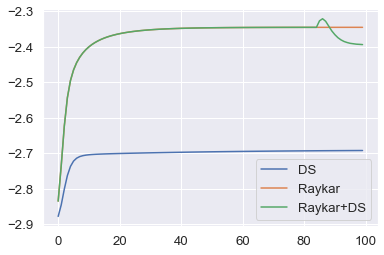

In [25]:
reload_all()
mushrooms_methods, mushroom_points, advantages_matrix = bm.compare_methods(mushrooms_data, max_iter=100, lr=0.5, 
                                                                           confidence_estimator=condidence_mushrooms)
bm.print_conf(mushrooms_methods)

/miniconda3/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


857 211


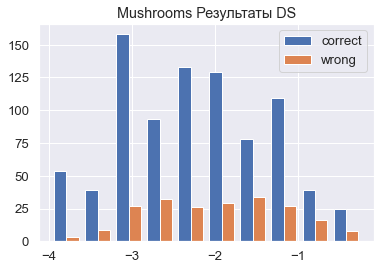

In [11]:
reload_all()
bm.plot_flips(mushroom_points[mushroom_points.task.isin(advantages_matrix[1][0])], 
              mushroom_points[mushroom_points.task.isin(advantages_matrix[0][1])], 'conf_mx_ds', 'Mushrooms')

857 211


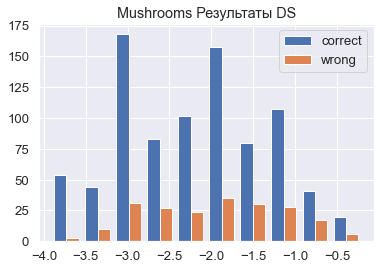

In [12]:
reload_all()
bm.plot_flips(mushroom_points[mushroom_points.task.isin(advantages_matrix[1][0])], 
              mushroom_points[mushroom_points.task.isin(advantages_matrix[0][1])], 'conf_mx_r', 'Mushrooms')

Annotation(annotator='0', task='945', value='1')
Annotation(annotator='2', task='945', value='1')
Annotation(annotator='3', task='945', value='1')
Annotation(annotator='4', task='945', value='1')


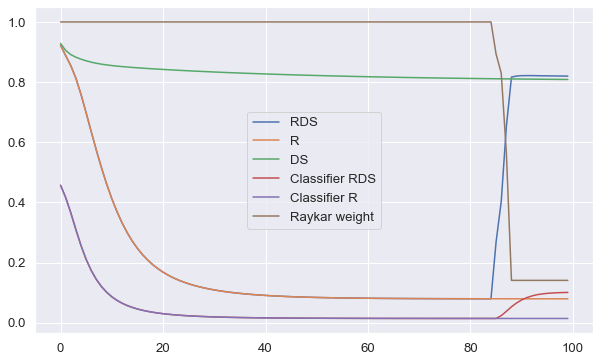

In [30]:
bm.plots_for_point(mushroom_points, mushrooms_data, mushrooms_methods, 6439)

857 434


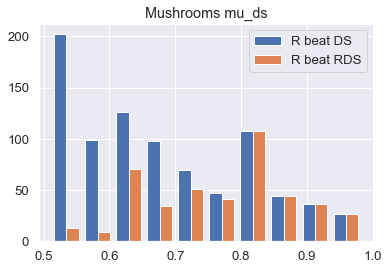

In [24]:
reload_all()
bm.plot_flips(mushroom_points[mushroom_points.task.isin(advantages_matrix[1][0])], 
              mushroom_points[mushroom_points.task.isin(advantages_matrix[1][2])], 'mu_ds', 'Mushrooms', 'R beat DS', 'R beat RDS')

/miniconda3/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


857 171


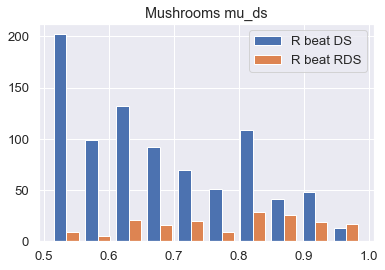

In [31]:
reload_all()
bm.plot_flips(mushroom_points[mushroom_points.task.isin(advantages_matrix[1][0])], 
              mushroom_points[mushroom_points.task.isin(advantages_matrix[2][1])], 'mu_ds', 'Mushrooms', 'R beat DS', 'R beat RDS')

In [ ]:
def scatter_cls(pts):
    print(len(pts))
    am = np.array(list(map(lambda x: np.argmax(x), pts['classifier_r'])))
    r = np.array(list(map(lambda x: x.max(), pts['classifier_r'])))
    rds = np.array(list(map(lambda x: x.max(), pts['classifier_rds'])))
    r, rds = [], []
    for arg, x in zip(am, pts['classifier_r']):
        r.append(x[arg])
    for arg, x in zip(am, pts['classifier_rds']):
        rds.append(x[arg])
#     plt.scatter(r, rds)
    r = np.array(r)
    rds = np.array(rds)
    plt.hist(r * rds)
    
scatter_cls(mushroom_points[mushroom_points.task.isin(advantages_matrix[1][0])])

In [ ]:
scatter_cls(mushroom_points[mushroom_points.task.isin(advantages_matrix[0][1])])

In [ ]:
res = []
for _, row in mushroom_points.iterrows():
    res.append(row.conf_mx_r + np.log(row.classifier_r) + np.log(row.classifier_rds))
res = np.array(res)
res = np.exp(res)
res = sklearn.preprocessing.normalize(res, axis=1, norm='l1')

estimates = {}
for i, row in mushroom_points.iterrows():
    estimates[row['task']] = mushrooms_methods[2].values[np.argmax(res[i])]

In [ ]:
all_points = 0
accepted = 0

for point in mushrooms_data.gold():
    if point.task in estimates:
        estimate = estimates[point.task]
        all_points += 1
        if point.value == estimate:
            accepted += 1

accuracy = accepted / all_points

In [ ]:
accuracy

In [ ]:
reload_all()
method = rb.RaykarWithBoosting()
method.fit(mushrooms_data.labels(), mushrooms_data.features(), max_iter=50)

In [ ]:
mushrooms_methods[-1].classifiers[0].w

In [ ]:
mushrooms_methods[-1].classifiers[1].w

In [ ]:
mushroom_points

In [ ]:
mushroom_points[mushroom_points.task.isin(advantages_matrix[0][1])][:20]

In [ ]:
reload_all()

bm.boosting_classifiers_distr(mushroom_points[mushroom_points.task.isin(advantages_matrix[1][0])],
                              mushroom_points[mushroom_points.task.isin(advantages_matrix[0][1])], 'Mushrooms', metric='minmax')  

In [ ]:
scatter_classifiers_distr(mushroom_points[mushroom_points.task.isin(advantages_matrix[1][0])],
                          mushroom_points[mushroom_points.task.isin(advantages_matrix[0][1])])  

In [ ]:
reload_all()
bm.plot_all_gradients(mushroom_points[mushroom_points.task.isin(advantages_matrix[1][0])],
                              mushroom_points[mushroom_points.task.isin(advantages_matrix[0][1])], 'Mushrooms') 

In [ ]:
reload_all()
bm.plot_all_gradients(mushroom_points[mushroom_points.task.isin(advantages_matrix[1][0])],
                              mushroom_points[mushroom_points.task.isin(advantages_matrix[0][1])], 'Mushrooms') 

In [6]:
mushrooms_data._features

{'0': array([-5.90357172e-01,  3.19133529e-01,  9.04467975e-01, -2.80110224e-03,
        -2.39271505e-01, -5.04318449e-02, -5.80099359e-01,  1.28334526e+00,
         2.95831975e-01, -2.18555343e-01,  8.44688759e-01, -1.07186817e-03,
        -6.10954414e-01, -4.26603281e-02,  1.14559967e+00, -2.66078297e-01,
         2.23639239e+00,  9.32224509e-01,  1.00087152e+00, -1.44073214e+00,
        -8.80501798e-01, -6.25634166e-02,  7.58139116e-01,  3.26380298e-01,
        -2.35118212e-01, -3.17712258e-02,  1.45627584e+00,  5.05700434e-01,
         5.33456905e-01,  2.29587389e-01,  2.20957706e-01,  3.08272775e-02,
        -1.99917682e-01,  7.02193068e-01,  1.52382309e-01, -7.25854669e-01,
        -2.10175214e-01, -8.53131862e-01,  8.19033333e-01,  2.17881985e-01,
         1.71882729e+00, -1.04236858e-01,  1.11608128e+00, -3.00407822e-01,
        -2.19867883e-01,  5.92881807e-01,  8.05568226e-01,  6.10084472e-01,
         1.15068016e-01, -2.28884315e-01,  2.55426611e-01,  1.18121091e+00,
       

In [29]:
mushroom_points[mushroom_points.task.isin(advantages_matrix[1][2])]

,task,mu_ds,conf_mx_ds,mu_r,conf_mx_r,classifier_r,grad_r,mu_rds,conf_mx_rds,classifier_rds,grad_rds,likelihood_rds,index
15,1010,"[0.729, 0.271]","[-1.507, -2.825]","[0.071, 0.929]","[-1.568, -2.746]","[0.023, 0.977]","[0.32363, 0.38326, 0.99977, 1.38656, 1.52043, ...","[0.568, 0.432]","[-1.499, -2.838]","[0.133, 0.867]",2.33404,"[0.566, 0.434]",15
73,1063,"[0.638, 0.362]","[-0.347, -1.241]","[0.454, 0.546]","[-0.383, -1.184]","[0.272, 0.728]","[1.03489, 1.13245, 1.24771, 1.30478, 1.29705, ...","[0.554, 0.446]","[-0.339, -1.252]","[0.315, 0.685]",1.28642,"[0.83, 0.17]",73
84,1073,"[0.729, 0.271]","[-0.891, -2.208]","[0.047, 0.953]","[-0.889, -2.251]","[0.012, 0.988]","[0.34377, 0.77705, 1.24463, 1.60178, 1.7661, 1...","[0.595, 0.405]","[-0.833, -2.389]","[0.098, 0.902]",2.64642,"[0.566, 0.434]",84
99,1087,"[0.636, 0.364]","[-1.072, -1.955]","[0.332, 0.668]","[-1.087, -1.914]","[0.179, 0.821]","[1.60899, 1.52235, 1.46995, 1.40663, 1.33583, ...","[0.537, 0.463]","[-1.054, -1.974]","[0.295, 0.705]",1.28594,"[0.83, 0.17]",99
134,1118,"[0.623, 0.377]","[-2.678, -3.505]","[0.291, 0.709]","[-2.559, -3.592]","[0.128, 0.872]","[0.32609, 0.65606, 0.98129, 1.24886, 1.41993, ...","[0.596, 0.404]","[-2.609, -3.705]","[0.265, 0.735]",1.80279,"[0.566, 0.434]",134
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6402,911,"[0.653, 0.347]","[-1.129, -2.088]","[0.096, 0.904]","[-1.131, -2.076]","[0.04, 0.96]","[1.58441, 1.473, 1.45567, 1.47113, 1.4638, 1.4...","[0.529, 0.471]","[-1.1, -2.229]","[0.152, 0.848]",2.04469,"[0.566, 0.434]",6402
6419,927,"[0.408, 0.592]","[-3.158, -3.11]","[0.526, 0.474]","[-3.269, -3.045]","[0.581, 0.419]","[0.24051, 0.34627, 0.34003, 0.24103, 0.10984, ...","[0.425, 0.575]","[-3.45, -3.092]","[0.53, 0.47]",0.56665,"[0.859, 0.141]",6419
6439,945,"[0.809, 0.191]","[-2.237, -4.005]","[0.079, 0.921]","[-2.221, -4.026]","[0.014, 0.986]","[2.5276, 2.56369, 2.65748, 2.73333, 2.73007, 2...","[0.82, 0.18]","[-2.166, -4.206]","[0.101, 0.899]",3.90752,"[0.141, 0.859]",6439
6458,962,"[0.823, 0.177]","[-2.139, -4.0]","[0.041, 0.959]","[-2.196, -3.918]","[0.008, 0.992]","[1.76693, 1.94191, 2.21665, 2.43102, 2.4906, 2...","[0.819, 0.181]","[-2.111, -4.146]","[0.097, 0.903]",3.81896,"[0.141, 0.859]",6458
